##### Main task
Ми хочемо зрозуміти, як користувачі з різних країн поводяться з часом:
– хто краще утримується \
– хто приносить більше цінності \
– де є проблеми продукту або локалізації 

Для цього треба:
> 1. Підготувати данні: очистка + створити InvoiceMonth
> 2. Визначити місяць входу користувача 
> 3. Обираємо топ країни
> 4. Рахуємо користувачів 
> 5. Рахуємо retention 
> 6. Будуємо heatmap

In [20]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Online Retail.xlsx') # !! треба змінити на свій шлях !!

In [3]:
# Data Cleaning 
df.drop_duplicates(inplace=True)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['CustomerID'].notnull())]

In [ ]:
# Створити InvoiceMonth
# you code 
df["InvoiceDate"] =  # use pd.t_datetime -та обрати колонку 
df["InvoiceMonth"] = # use df['обрати колонку'].dt.to_period("M").dt.to_timestamp()


In [ ]:
# Створити CohortMonth
df["CohortMonth"] = (
   # you code
   df.# groupby("обрати колонку")["обрати колонку"]
    df.groupby("CustomerID")["InvoiceDate"]
      .transform("min") # щоб отримати одного розміру мін по даті для кожного запису
      .dt.to_period("M").dt.to_timestamp()
)


In [7]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [12]:
# Формування час використання 
year_diff = df["InvoiceMonth"].dt.year - df["CohortMonth"].dt.year
month_diff = df["InvoiceMonth"].dt.month - df["CohortMonth"].dt.month

df["CohortIndex"] = year_diff * 12 + month_diff + 1


In [ ]:
# Обираємо топ країни
top_countries = (
    # you code
)

df_geo = df[df["Country"].isin(top_countries)]


In [16]:
df_geo['Country'].value_counts()

Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64

In [ ]:
cohort_counts_geo = pd.pivot_table( # щоб створити зведену таблицю
        df_geo,
        index = [], # обрати індекси
        columns = "", # обрати колонку
        values = "", # обрати значення 
        aggfunc="nunique" # aggregation
    
)

In [ ]:
# Рахуємо retention
cohort_sizes_geo = cohort_counts_geo.iloc[:, 0]
cohort_sizes_geo
retention_geo = cohort_counts_geo.divide(cohort_sizes_geo, axis=0)


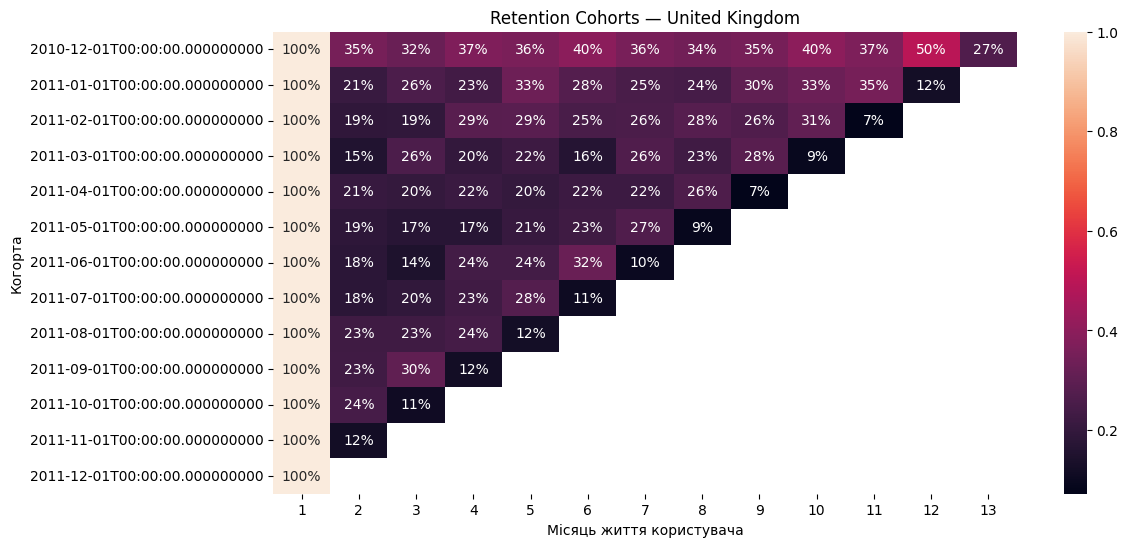

In [26]:
# Будуємо heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_geo.loc["United Kingdom"],
    annot=True,
    fmt=".0%",

)
plt.title("Retention Cohorts — United Kingdom")
plt.xlabel("Місяць життя користувача")
plt.ylabel("Когорта")
plt.show()


In [36]:
# Revenue/LTV
# revenue_geo = pd.pivot_table(
#     df_geo,
#     index=["Country", "CohortMonth"],
#     columns="CohortIndex",
#     values="Revenue",
#     aggfunc="sum"
# )
# revenue_geo

In [37]:
# ARPU
# arpu_geo = revenue_geo.divide(cohort_counts_geo, axis=0)
# arpu_geo

In [38]:
# LTV
# ltv_geo = arpu_geo.cumsum(axis=1)
# ltv_geo